<a href="https://colab.research.google.com/github/Molter73/ai-class/blob/main/Aprendizaje_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje No-Supervisado

Recordemos que el proposito del aprendizaje automatico superviado es predecir la realidad. El aprendizaje no supervisado tiene como proposito clasificar la realidad y generar predicciones sobre esta clasificacion. El aprendizaje no supervisado clasifica por similaridad.

La principal ventaja del aprendizaje no supervisado es que no se necesitan series de datos etiquetadas para proceder a la clasificacion.

La gran mayoria de modelos de aprendizaje no supervisado utilizan tecnicas de agrupacion por similaridad (distancia) entre parametros.

Vamos a necesitar los siguientes modulos:

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

Generamos un grupo de puntos utilizando la funcion make_blobs:

In [2]:
puntos, idx_grupos = make_blobs(n_samples=300,
                                centers=4,
                                cluster_std=0.8,
                                random_state=0)

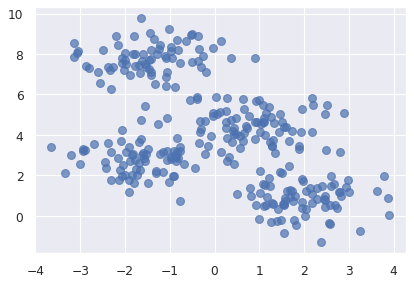

In [3]:
x = puntos[:, 0]
y = puntos[:, 1]

plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x, y, s=50, alpha=0.7);

Podemos ajustar estos puntos a un numero determinado de grupos:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


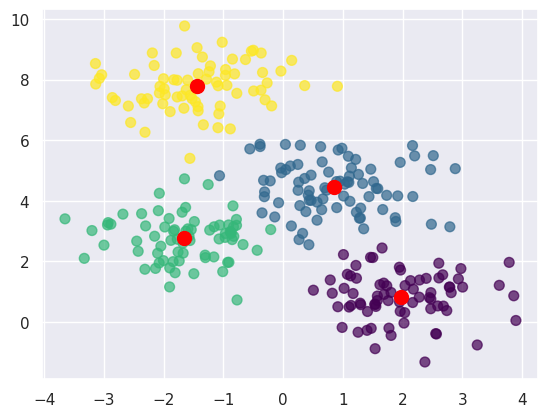

In [4]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means
k_medias = KMeans(n_clusters=4, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)

plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')

centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Este es el procedimiento del algoritmo:

![picture](https://drive.google.com/uc?export=view&id=1-05xoK1X6jPUlA-lRg-E2mSP7STLM-Me)

¿Puedes probar a agrupar estos puntos en otro numero de grupos: 2, 3, 5 y 15 grupos?¿Que efecto tiene en la posicion de los centroides?¿Cual es el numero correcto de grupos?

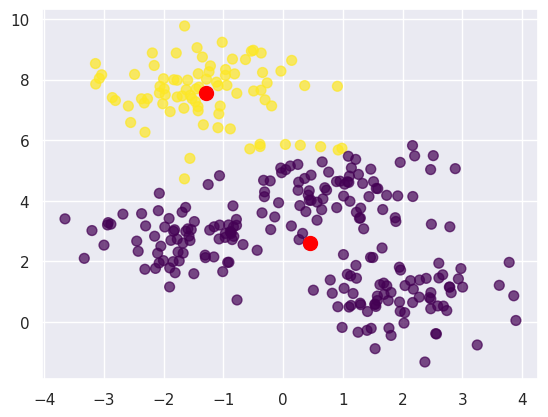

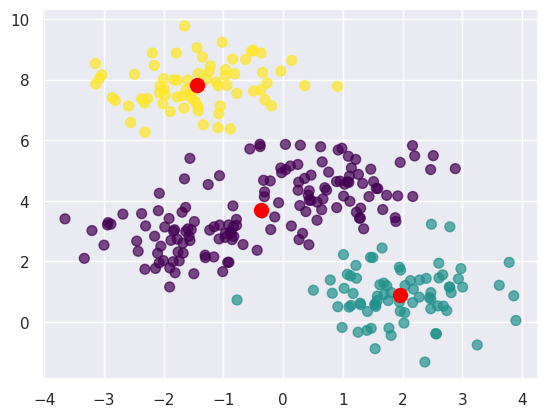

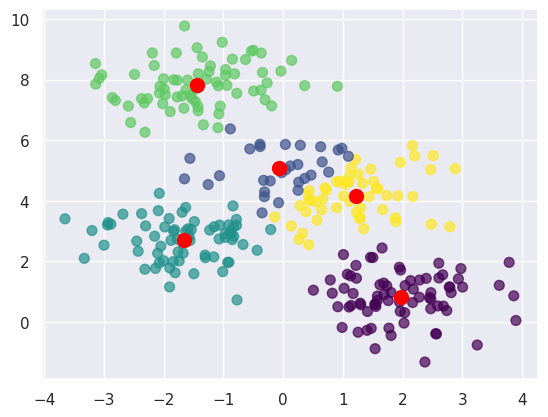

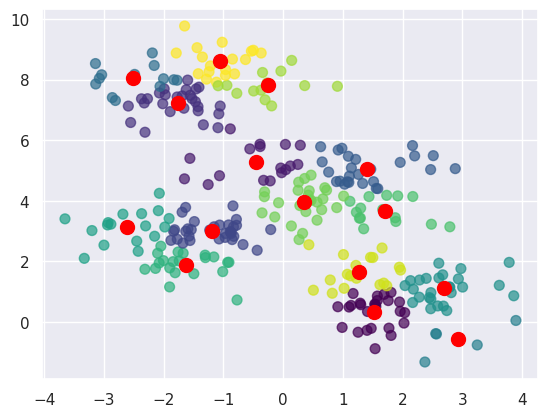

In [5]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means
group_sizes = [2, 3, 5, 15]
for n in group_sizes:
  k_medias = KMeans(n_clusters=n, random_state=0, n_init=10)
  k_medias.fit(puntos)
  idx_prediccion = k_medias.predict(puntos)

  plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')

  centroides = k_medias.cluster_centers_
  plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);
  plt.show()

Podemos utilizar un metodo menos visual para decidir el numero de grupos que nos ofrece la clasificacion mas efectiva:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

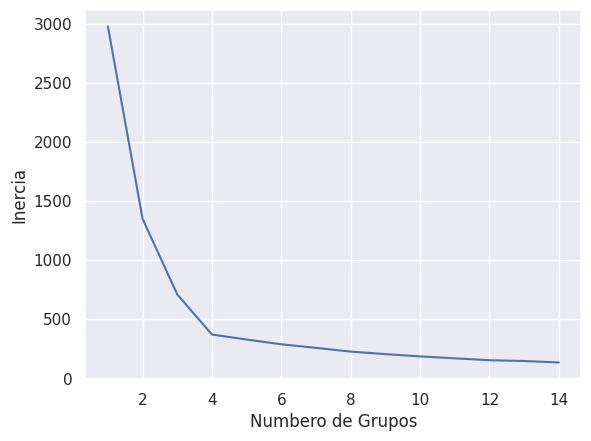

In [6]:
inercias = []

for i in range(1, 15):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)

plt.plot(range(1, 15), inercias)
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia');

Ya que el metodo visual no es muy mecanico, podemos encontrar la posicion del mejor valor en el codo mediante la doble derivacion:

In [7]:
pct_difs = np.diff(inercias)/np.array(inercias[1:])
pct_difs

array([-1.20820979, -0.90310861, -0.91804932, -0.12904541, -0.14077872,
       -0.11760151, -0.14126267, -0.10352559, -0.10580101, -0.09651899,
       -0.10575639, -0.0457493 , -0.09128665])

In [8]:
pct_dif_dif = np.diff(pct_difs)
pct_dif_dif

array([ 0.30510118, -0.01494072,  0.78900391, -0.01173331,  0.02317721,
       -0.02366116,  0.03773707, -0.00227542,  0.00928202, -0.0092374 ,
        0.0600071 , -0.04553735])

In [9]:
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

4

# Segmentacion de clientes

Datos adaptados de:
https://github.com/jeffprosise/Machine-Learning/blob/master/Data/customers.csv

Este tipo de tecnicas se pueden utilizar para segmentar, por ejemplo, los clientes de una empresa para poder ofrecerles el mejor servicio personalizado posible:

In [11]:
import pandas as pd

archivo_clientes = '/content/clientes.txt'
clientes = pd.read_csv(archivo_clientes, index_col='ID:Cliente')
clientes.head()

,Genero,Edad,Salario,Clasificacion_gasto
ID:Cliente,,,,
1,Hombre,19,15,39
2,Hombre,21,15,81
3,Mujer,20,16,6
4,Mujer,23,16,77
5,Mujer,31,17,40


Salario y Clasificacion de Gasto nos pueden indicar que clientes podrian estar interesados en aumentar su nivel de compras:

In [12]:
puntos = clientes[ ['Salario','Clasificacion_gasto'] ].values
print(puntos)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Otra manera de hacer el vector.

In [13]:
x = clientes[['Salario']].values.squeeze()
y = clientes[['Clasificacion_gasto']].values.squeeze()
print(x)
print(y)

[ 15  15  16  16  17  17  18  18  19  19  19  19  20  20  20  20  21  21
  23  23  24  24  25  25  28  28  28  28  29  29  30  30  33  33  33  33
  34  34  37  37  38  38  39  39  39  39  40  40  40  40  42  42  43  43
  43  43  44  44  46  46  46  46  47  47  48  48  48  48  48  48  49  49
  50  50  54  54  54  54  54  54  54  54  54  54  54  54  57  57  58  58
  59  59  60  60  60  60  60  60  61  61  62  62  62  62  62  62  63  63
  63  63  63  63  64  64  65  65  65  65  67  67  67  67  69  69  70  70
  71  71  71  71  71  71  72  72  73  73  73  73  74  74  75  75  76  76
  77  77  77  77  78  78  78  78  78  78  78  78  78  78  78  78  79  79
  81  81  85  85  86  86  87  87  87  87  87  87  88  88  88  88  93  93
  97  97  98  98  99  99 101 101 103 103 103 103 113 113 120 120 126 126
 137 137]
[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 5

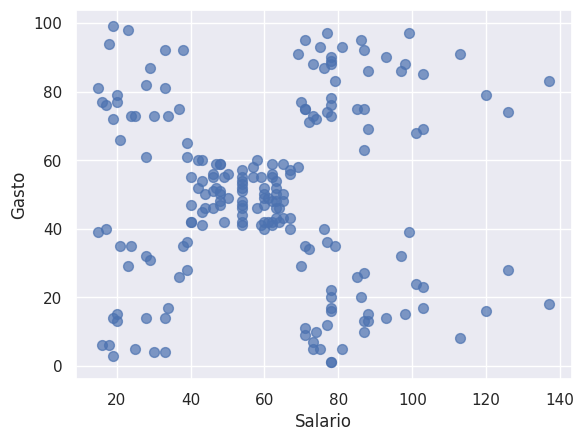

In [14]:
x = puntos[:, 0]
y = puntos[:, 1]

plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Salario')
plt.ylabel('Gasto');

¿En cuantos grupos podemos agruparlos? Visualmente parece que 5 grupos nos dan el menor numero de grupos que maximiza las diferencias entre los clientes de cada grupo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


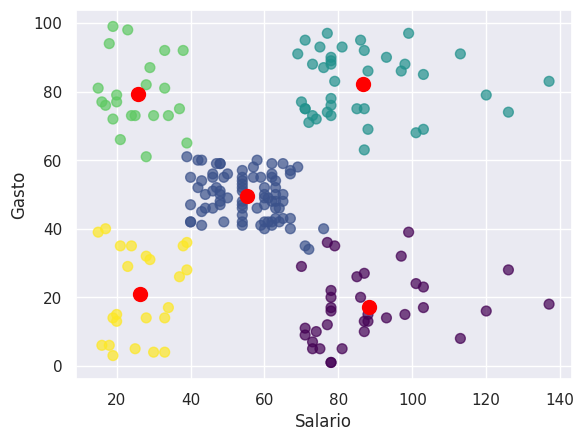

In [15]:
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)

plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Salario')
plt.ylabel('Gasto')

centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Hemos elegido 5 grupos por inspeccion visual del grafico. ¿Podrias demostrar que esta eleccion es correcta?

In [16]:
inercias = []

for i in range(1, 15):
  k_medias = KMeans(n_clusters=i, random_state=0, n_init=10)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)

# Realizamos la doble derivada y buscamos el punto de inflexión
pct_difs = np.diff(inercias)/np.array(inercias[1:])
pct_dif_dif = np.diff(pct_difs)
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

5

In [17]:
# Ajustamos k_medias al mejor codo
k_medias = KMeans(n_clusters=mejor_codo, random_state=0, n_init=10)
k_medias.fit(puntos);

¿Cuales son los clientes con mayor salario y menor gasto? Podemos predecir en que grupo apareceria un cliente que tenga un salario de 120 y un gasto de 20:

In [18]:
objetivo = k_medias.predict(np.array([[120, 20]]))[0]
objetivo

0

Los clientes de este grupo de interes se pueden extraer de la serie de datos completa:

In [19]:
# Grupo de poco gastadores con altos ingresos:
clientes['Grupo'] = k_medias.predict(clientes[['Salario','Clasificacion_gasto']].values)
# Filtrado solo para estos clientes:
clientes[ clientes['Grupo'] == objetivo]

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
ID:Cliente,,,,,
125,Mujer,23,70,29,0
129,Hombre,59,71,11,0
131,Hombre,47,71,9,0
135,Hombre,20,73,5,0
137,Mujer,44,73,7,0
139,Hombre,19,74,10,0
141,Mujer,57,75,5,0
145,Hombre,25,77,12,0
147,Hombre,48,77,36,0


In [20]:
clientes.tail()

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
ID:Cliente,,,,,
196,Mujer,35,120,79,2
197,Mujer,45,126,28,0
198,Hombre,32,126,74,2
199,Hombre,32,137,18,0
200,Hombre,30,137,83,2


Orientando nuestros esfuerzos de marketing y ventas hacia estos clientes quizas maximicemos nuestra eficacia. Otro modelo podria entonces clasificar los clientes por susceptibilidad a nuestras ofertas.

# Clasificacion Multivariable

La clasificacion no esta limitada a dos variables (bivariable), sino que puede ser multivariable. Para ello, debemos primero modificar el formato de nuestros datos para hacer todas las variables comprensibles por la maquina:

In [21]:
from sklearn.preprocessing import LabelEncoder

df = clientes.copy()
codificador = LabelEncoder()
df['Genero'] = codificador.fit_transform(df['Genero'])
df.head()

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
ID:Cliente,,,,,
1,0,19,15,39,4
2,0,21,15,81,3
3,1,20,16,6,4
4,1,23,16,77,3
5,1,31,17,40,4


Generando codificadores de etiquetas:

In [22]:
codificador_frutas = LabelEncoder()
frutas = ['Piña', 'Platano', 'Manzana', 'Pera']

In [23]:
codificador_frutas.fit(frutas);

In [24]:
codificador_frutas.transform(['Pera'])

array([1])

In [25]:
codificador_frutas.inverse_transform([3])

array(['Platano'], dtype='<U7')

Usaremos 3 variables inicialmente, es el limite de variables que podemos representar facilmente en el espacio tridimensional:

In [26]:
puntos = df[['Edad', 'Salario', 'Clasificacion_gasto']].values

In [27]:
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
df['Grupo'] = k_medias.predict(puntos)
df.Grupo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ID:Cliente
1      0
2      4
3      0
4      4
5      0
      ..
196    1
197    3
198    1
199    3
200    1
Name: Grupo, Length: 200, dtype: int32

Generamos una visualizacion tridimensional:

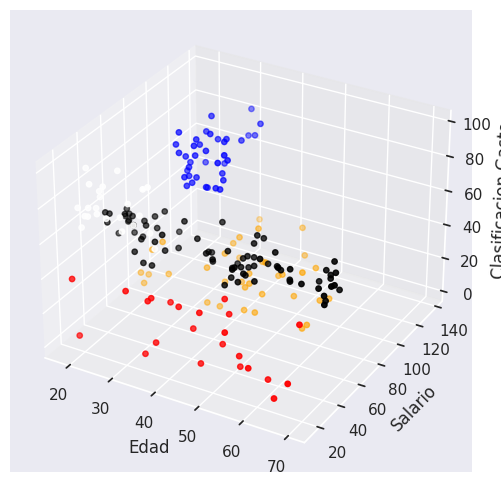

In [28]:
from mpl_toolkits.mplot3d import Axes3D

colors = ['red', 'blue', 'black', 'orange', 'white']

df['color'] = df.Grupo.map({0:colors[0], 1:colors[1], 2:colors[2],
                        3:colors[3], 4:colors[4]})

fig = plt.figure(figsize=(26,6))

ax = fig.add_subplot(132, projection='3d')
ax.scatter(df.Edad, df.Salario, df.Clasificacion_gasto, c=df.color, s=15)
ax.set_xlabel('Edad')
ax.set_ylabel('Salario')
ax.set_zlabel('Clasificacion Gasto')
plt.show()

¿Como son estos grupos? Inspeccionando sus valores medios ganamos algo mas de informacion:

In [29]:
resultados = pd.DataFrame(columns = ['Grupo',
                                     'Edad',
                                     'Ingresos Medios',
                                     'Gasto Medio'])

for i in range(len(k_medias.cluster_centers_)):
    edad = df[df['Grupo'] == i]['Edad'].mean()
    ingresos = df[df['Grupo'] == i]['Salario'].mean()
    gasto = df[df['Grupo'] == i]['Clasificacion_gasto'].mean()

    gdf = df[df['Grupo'] == i]

    resultados.loc[i] = ([i, edad, ingresos, gasto])

resultados.head()

,Grupo,Edad,Ingresos Medios,Gasto Medio
0,0.0,45.217391,26.304348,20.913043
1,1.0,32.692308,86.538462,82.128205
2,2.0,43.088608,55.291139,49.569620
3,3.0,40.666667,87.750000,17.583333
4,4.0,25.521739,26.304348,78.565217


In [30]:
k_medias.predict(np.array([[26, 26, 80]]))[0]

4

# Actividad:

Utilizando el archivo de datos sobre propiedas en EEUU, ¿Que tipo de grupos puedes generar mediante aprendizaje no supervisado? ¿Que aplicaciones o utilidades podriamos extraer de estos datos?

Se podría relacionar ingreso medio y población del área, pudiendo obtener con estos datos el precio promedio de las propiedades que personas con ese nivel de ingreso en poblaciones de ese tamaño.

Los datos son los siguientes:

'Avg. Area Income': Ingresos medios de los residentes en la localizacion.
'Avg. Area House Age': Antiguedad media de las casas en la ciudad.
'Avg. Area Number of Rooms': Media de habitaciones por casa en la zona.
'Avg. Area Number of Bedrooms': Media de dormitorios por casa en la zona.
'Area Population': Poblacion de la zona en la que se localiza la casa.
'Price': Precio de la casa.
'Address': Direccion postal de la casa.

In [31]:
import pandas as pd

archivo_casas = '/content/USA_Housing.csv'
casas = pd.read_csv(archivo_casas)
casas.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [90]:
def extraer_puntos(df):
  return df[['Avg. Area Income', 'Area Population']].values

In [91]:
df = casas.copy()
puntos = extraer_puntos(df)

In [92]:
from scipy import spatial

def similitud(centroide, punto):
  return 1 - spatial.distance.cosine(centroide, punto)

def similitud_media(centroide, puntos):
  acc = 0
  for punto in extraer_puntos(puntos):
    acc += similitud(centroide, punto)

  return acc / len(puntos)

In [93]:
similitudes = []

for i in range(1, 15):
  k_medias = KMeans(n_clusters=i, random_state=0, n_init=10)
  k_medias.fit(puntos)
  df = casas.copy()
  df['Group'] = k_medias.predict(puntos)
  acc = 0
  for j in range(i):
    acc += similitud_media(k_medias.cluster_centers_[j], df[df['Group'] == j])
  similitudes.append(acc / i)
print(similitudes)
nodos = similitudes.index(max(similitudes)) + 1
print(nodos)


[0.9912304917657909, 0.9926142686920987, 0.9959414518050149, 0.9968834963657508, 0.9972405909373461, 0.9976011476570062, 0.9976977353922635, 0.9978933939041877, 0.9980559156331419, 0.9982637599172961, 0.9983970823973263, 0.998506226102691, 0.9985085078343676, 0.9986510798562882]
14


In [94]:
k_medias = KMeans(n_clusters=nodos, random_state=0, n_init=10)
k_medias.fit(puntos)
df = casas.copy()
df['Group'] = k_medias.predict(puntos)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Group
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",7
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",9
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",11
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,11
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,4


In [96]:
fields = [
  'Avg. Area Income',
  'Avg. Area House Age',
  'Avg. Area Number of Rooms',
  'Avg. Area Number of Bedrooms',
  'Area Population',
  'Price'
]
resultados = pd.DataFrame(columns = ['Group',
                                     'Avg. Area Income',
                                     'Avg. Area House Age',
                                     'Avg. Area Number of Rooms',
                                     'Avg. Area Number of Bedrooms',
                                     'Area Population',
                                     'Price'])

for i in range(len(k_medias.cluster_centers_)):
  group = df[df['Group'] == i]
  resultado = [
    group[field].mean() for field in fields
  ]
  resultado.insert(0, i)
  resultados.loc[i] = resultado

resultados

,Group,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.0,76834.544628,5.979459,6.936380,3.952441,33067.235827,1.361287e+06
1,1.0,62027.626031,5.949119,7.001839,3.914784,45629.545830,1.227225e+06
2,2.0,63224.243100,6.073384,6.944863,3.954231,19373.087241,8.757653e+05
3,3.0,86893.640709,6.048890,6.973090,3.952698,28686.687011,1.522436e+06
4,4.0,67285.440758,5.992530,6.976439,4.034489,28736.520713,1.092239e+06
5,5.0,87426.188298,5.951873,6.938765,4.048144,42855.849207,1.729074e+06
6,6.0,48987.052076,6.047239,7.052314,3.950927,41995.727961,9.127058e+05
7,7.0,76057.058803,5.998473,7.045194,4.124161,21084.335623,1.169610e+06
8,8.0,58485.885230,5.962829,6.993848,3.838140,57212.117376,1.330653e+06
9,9.0,75029.402125,5.965309,7.015737,4.010111,43245.410086,1.483497e+06


In [106]:
group = k_medias.predict(np.array([[50000, 10000]]))[0]
print(f'Grupo {group}')
df[df['Group'] == group].head()

Grupo 2


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Group
17,61929.077018,4.788550,5.097010,4.30,24595.901498,5.284852e+05,"5498 Rachel Locks\nNew Gregoryshire, PW 54755",2
47,69144.745707,7.296224,5.928223,3.22,19030.615487,9.801773e+05,Unit 8108 Box 5159\nDPO AP 04678,2
57,68488.131173,6.116112,7.182527,5.08,18267.954706,1.186689e+06,"84473 Ochoa Pines Apt. 808\nJamesport, KY 7020...",2
98,65984.750645,6.512270,6.316480,2.38,21867.476940,9.547466e+05,"01818 Wilson Spurs\nWest Andreaton, SD 69568-7005",2
110,55472.654827,4.822147,5.855972,3.20,15353.956429,3.406052e+05,"91111 Crane Spur\nKathleenmouth, ME 43022-3191",2
